In [1]:
pip install opencv-contrib-python-headless

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [3]:
img=cv2.imread('img.jpg')

In [4]:
img.shape

(397, 600, 3)

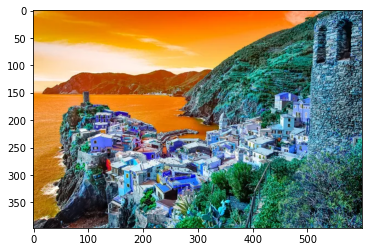

In [5]:
plt.imshow(img)

In [6]:
#matplotlib work in RGB and cv2 in BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

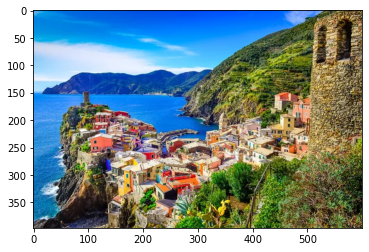

In [7]:
plt.imshow(img)

In [8]:
 #reduce the size of image
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)    #cv2.resize(img, img.shape[1], img.shape[0]
img.shape

(39, 60, 3)

In [9]:
#convert matrix into single array or list flattening
pixels = img.reshape((-1, 3))
print(pixels.shape)

(2340, 3)


In [10]:
#how many cluster of different cluster you want
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans()

In [11]:
#centers of different cluster
colors = np.asarray(km.cluster_centers_, dtype='uint8') 
print(colors)

[[ 98 101  51]
 [  6 125 240]
 [189 163 133]
 [ 51  58  35]
 [196 223 246]
 [ 30  93 165]
 [ 74 168 238]
 [147 123  84]]


In [12]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32') #count of each colour
per = per / pixels.shape[0]  #fraction of each different color
per 

array([0.23974359, 0.14188035, 0.10982906, 0.12692308, 0.05982906,
       0.07649573, 0.07136752, 0.17393163], dtype=float32)

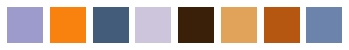

In [13]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3)) #multidimentional metrics
     
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch.astype('uint8'))


In [14]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)#find the reverse order of dominant colors

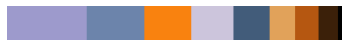

In [15]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch.astype('uint8'))
plt.show()